## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from matplotlib import pyplot as plt


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
unique_mice_initially = combined_df["Mouse ID"].nunique()
unique_mice_initially

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df_dups = combined_df[combined_df.duplicated(keep=False)]
#dup_id=combined_df_dups["Mouse ID"].unique()
dup_id=combined_df_dups.iloc[0,0]
dup_id

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df_dups = combined_df[combined_df.duplicated(keep=False)]
combined_df_dups.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df.drop_duplicates()
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_clean = clean_df["Mouse ID"].nunique()
unique_mice_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create table grouped by Drug Regimen
grouped_df = clean_df.groupby(["Drug Regimen"])

# # Create table of the mean of Tumor Volume (for each Drug Regimen)  
mean_of_clean = grouped_df["Tumor Volume (mm3)"].mean()

# # Create table of the mean of Tumor Volume (for each Drug Regimen)  
median_of_clean = grouped_df["Tumor Volume (mm3)"].median()

# # Create table of the mean of Tumor Volume (for each Drug Regimen)  
variance_of_clean = grouped_df["Tumor Volume (mm3)"].var()

# # Create table of the mean of Tumor Volume (for each Drug Regimen)  
sd_of_clean = grouped_df["Tumor Volume (mm3)"].std()

# # Create table of the mean of Tumor Volume (for each Drug Regimen)  
sem_of_clean = grouped_df["Tumor Volume (mm3)"].sem()

# # Pull all of the tables together and create summary table data frame
regimen_summary_df=pd.DataFrame({"Mean Tumor Volume (mm3)":mean_of_clean, "Median Tumor Volume (mm3)":median_of_clean,
                                 "Variance Tumor Volume (mm3)":variance_of_clean, "SD Tumor Volume (mm3)":sd_of_clean,
                                 "SEM Tumor Volume (mm3)":sem_of_clean})


# Format as the last step
regimen_summary_df["Mean Tumor Volume (mm3)"] = regimen_summary_df["Mean Tumor Volume (mm3)"].astype(float).map("{:,.2f}".format)
regimen_summary_df["Median Tumor Volume (mm3)"] = regimen_summary_df["Median Tumor Volume (mm3)"].astype(float).map("{:,.2f}".format)
regimen_summary_df["Variance Tumor Volume (mm3)"] = regimen_summary_df["Variance Tumor Volume (mm3)"].astype(float).map("{:,.2f}".format)
regimen_summary_df["SD Tumor Volume (mm3)"] = regimen_summary_df["SD Tumor Volume (mm3)"].astype(float).map("{:,.2f}".format)
regimen_summary_df["SEM Tumor Volume (mm3)"] = regimen_summary_df["SEM Tumor Volume (mm3)"].astype(float).map("{:,.2f}".format)

regimen_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SD Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.37,50.91,42.28,6.50,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

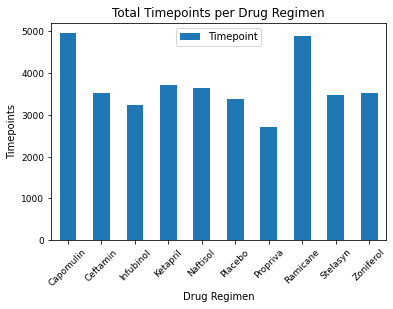

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create table grouped by Drug Regimen
grouped_df = clean_df.groupby(["Drug Regimen"])

# Create table of total number of Timepoints for each drug regimen
timepoint_sum = grouped_df["Timepoint"].sum()
timepoint_sum["Timepoint"] = grouped_df["Timepoint"].sum()

# Create DataFrame
df = pd. DataFrame({'Drug Regimen': timepoint_sum.index[0:10], 
                    'Timepoint': timepoint_sum[0:10]})
 
#create bar graph using Pandas
bargraph = df. plot. bar(x = 'Drug Regimen', fontsize='9')

# giving title to the plot
plt.title("Total Timepoints per Drug Regimen")

# giving X and Y labels
plt.ylabel("Timepoints")
plt.xticks(rotation=45)

x_axis
[0 1 2 3 4 5 6 7 8 9]



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

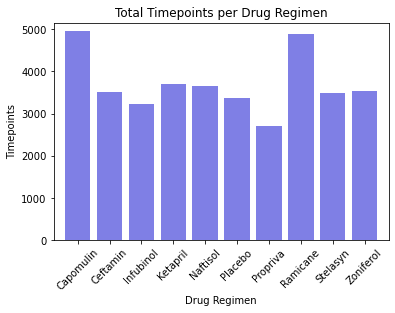

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#x_axis = np.arange(len(users)) #In [4]:  # Tell matplotlib that we will be making a bar chart
x_timeport=timepoint_sum[0:10]
x_axis = np.arange(len(x_timeport)) 


print("x_axis")
print(x_axis)
print()


# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
plt.bar(x_axis, x_timeport, color='mediumblue', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_sum.index[0:10])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(x_timeport)+200)

# Give our chart some labels and a tile
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation=45)

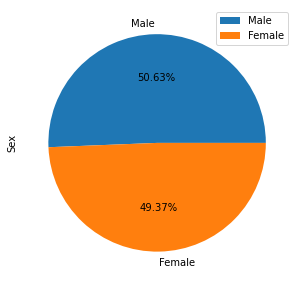

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create table grouped by sex
grouped_sex_df = clean_df.groupby(["Sex"])

# Create table of total number gender for each sex
sex_count = grouped_sex_df["Mouse ID"].count()

df = pd.DataFrame({'Sex': [sex_count["Male"],sex_count["Female"]]},
                  index=['Male', 'Female'])
plot = df.plot.pie(y='Sex', autopct='%0.2f%%', figsize=(5, 5))

(-1.1183816489819711,
 1.1071412960659854,
 -1.1143924872882185,
 1.108316575380457)

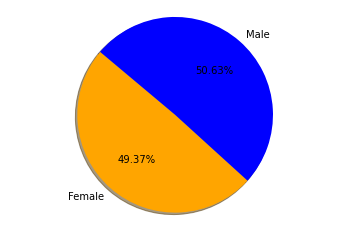

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [sex_count["Female"], sex_count["Male"]]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to seperate a section or sections from the others
explode = (0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%0.2f%%", shadow=True, startangle=140)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#Create table grouped by Mouse ID
grouped_mouse_df = clean_df.groupby(["Mouse ID"])
# print("grouped_mouse_df")
# print(grouped_mouse_df)
# print

# # Create table of the Max Timepoints for each mouse
timepoint_max = grouped_mouse_df["Timepoint"].max()
# print("timepoint_max")
# print(timepoint_max)
# print

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Combine the data into a single dataset
merged_df = pd.merge(timepoint_max, clean_df, how='inner', on=['Mouse ID', 'Timepoint'])
#print("merged_df")
print(merged_df)
#print

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
244     z435         10           48.710661                 0     Propriva   
245     z578         45           30.638696                 0     Ramicane   
246     z581         45           62.754451                 3    Infubinol   
247     z795         45           65.741070                 3     Naftisol   
248     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20  

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
current_treatment = ""
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol_data_appended = []
for treatment in list_of_treatments:
    current_treatment=treatment
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data_appended.append(tumor_vol_data)
#     print("tumor_vol_data_appended")
#     print(tumor_vol_data_appended)
#     print

    # add subset 
    # what is this for ???

    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"For the {current_treatment} Drug Regimen Treatment:")
    print(f"   The lower quartile of temperatures is: {lowerq}")
    print(f"   The upper quartile of temperatures is: {upperq}")
    print(f"   The interquartile range of temperatures is: {iqr}")
    print(f"   The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"   Values below {lower_bound} could be outliers.")
    print(f"   Values above {upper_bound} could be outliers.")
    potential_spam = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data < lower_bound)]
    #if (tumor_vol_data.min() < lower_bound):
        #print(f"{spam} looks like a lower bound outlier")
    if potential_spam.item == "Series([], Name: Tumor Volume (mm3), dtype: float64)":
        print()    #Trying to clean out the unwanted crap, but not working correctly
    else:
        print(f"   {potential_spam} looks like a lower bound outlier")
        print()
    

For the Capomulin Drug Regimen Treatment:
   The lower quartile of temperatures is: 32.37735684
   The upper quartile of temperatures is: 40.1592203
   The interquartile range of temperatures is: 7.781863460000004
   The the median of temperatures is: 38.1251644 
   Values below 20.70456164999999 could be outliers.
   Values above 51.83201549 could be outliers.
   Series([], Name: Tumor Volume (mm3), dtype: float64) looks like a lower bound outlier

For the Ramicane Drug Regimen Treatment:
   The lower quartile of temperatures is: 31.56046955
   The upper quartile of temperatures is: 40.65900627
   The interquartile range of temperatures is: 9.098536719999998
   The the median of temperatures is: 36.56165229 
   Values below 17.912664470000003 could be outliers.
   Values above 54.30681135 could be outliers.
   Series([], Name: Tumor Volume (mm3), dtype: float64) looks like a lower bound outlier

For the Infubinol Drug Regimen Treatment:
   The lower quartile of temperatures is: 54.048

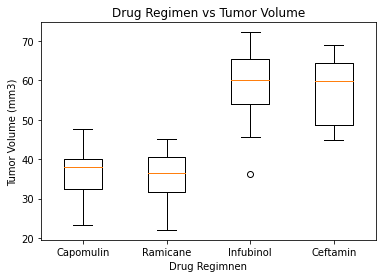

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen vs Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimnen')
ax1.boxplot(tumor_vol_data_appended)
ax1.set_xticklabels(list_of_treatments, ha='center')
plt.show()

## Line and Scatter Plots

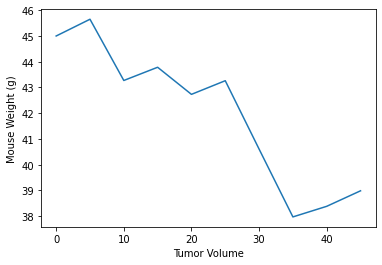

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_data_by_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == 'b128']

plt.plot(capomulin_data_by_mouse["Timepoint"],capomulin_data_by_mouse["Tumor Volume (mm3)"])
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight (g)')
plt.show()

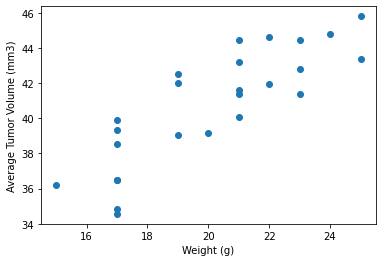

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# For the first example, determine which pairs of factors are correlated. 

capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_average_tumor = capomulin_data.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_average_tumor["Weight (g)"],capomulin_average_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Compute the Pearson correlation coefficient Mouse Weight and Average Tumor Volume for the Capomulin regimen
# capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
# capomulin_average_tumor = capomulin_data.groupby(["Mouse ID"]).mean()
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_average_tumor = capomulin_data.groupby(["Mouse ID"]).mean()
# print("capomulin_average_tumor")
# print(capomulin_average_tumor)
# print()

mouse_weight = capomulin_average_tumor.iloc[:,4]
tumor_volume = capomulin_average_tumor.iloc[:,1]
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The correlation between both factors is 0.84
line_eq is: y = 0.95x + 21.55


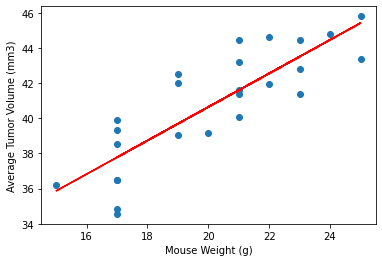

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()

# Followed code above from 01-Lesson-Plans/05-Matplotlib/3/Activities/08-Ins_Fits_and_Regression/Solved/regression.ipynb 
# but it didn't seem to print the line on the chart
x_values = capomulin_average_tumor.iloc[:,4]
y_values = capomulin_average_tumor.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()